<a href="https://colab.research.google.com/github/Johnattanls/Dimensionality_Reduction_in_-Images_for_RNA/blob/main/DIO_Project_2_Dimensionality_Reduction_in__Images_for_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required dependencies

In [9]:
%matplotlib inline

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from PIL import Image

Creating the function to reduce a color image to a 250-level grayscale image.

In [10]:
def color_to_grayscale(image, levels=250):
    # Get image dimensions
    height, width = len(image), len(image[0])

    # Convert the image to grayscale
    grayscale_image = [[0] * width for _ in range(height)]  # Create an empty grayscale image
    for i in range(height):
        for j in range(width):
            r, g, b = image[i][j]  # Get RGB components of the pixel
            # Convert to grayscale using the luminosity formula
            gray = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            # Adjust for 250 levels
            grayscale_image[i][j] = int((gray / 255) * (levels - 1))
    return grayscale_image

def grayscale_to_black_and_white(grayscale_image, threshold=127):
    # Get image dimensions
    height, width = len(grayscale_image), len(grayscale_image[0])

    # Convert grayscale image to black and white
    binary_image = [[0] * width for _ in range(height)]  # Create an empty binary image
    for i in range(height):
        for j in range(width):
            # Apply the threshold to convert to black (0) or white (255)
            binary_image[i][j] = 255 if grayscale_image[i][j] > threshold else 0
    return binary_image

Function to load image and return it in a vector with a defined resolution.

In [11]:
# def get_image(path,w,h): # [not necessary]
#     img = image.load_img(path, target_size=(h, w))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     return img, x

def get_image(path, scale=100):
    # Load the original image
    img = Image.open(path)

    # Get the original dimensions of the image (in pixels)
    original_width, original_height = img.size

    # Calculate the new dimensions based on the scale percentage
    new_width = int(original_width * (scale / 100))
    new_height = int(original_height * (scale / 100))

    # Resize the image to the new dimensions
    img_resized = img.resize((new_width, new_height))

    # Convert the resized image to a NumPy array for use with models
    x = image.img_to_array(img_resized)  # Converts the image to a NumPy array
    x = np.expand_dims(x, axis=0)  # Adds an extra dimension for the batch (even though it's just one image)
    x = preprocess_input(x)  # Preprocess the image (if necessary for the model)

    return img_resized, x  # Return the resized image and the preprocessed array for the model


Let's play! Upload an image and see what it will look like with the new resolution and in grayscale.

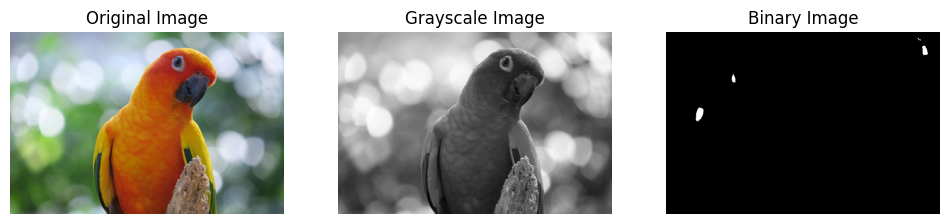

In [15]:
path="sample-image.jpg" #setting the path of the image to be loaded
#w,h=1200,1600 #setting image resolution [not necessary]
scale=20  #setting image resolution in %
img_recized, x=get_image(path,scale) #loading and pre-processing the image to the requested resolution and to array
#img_array = np.array(img) #unnecessary, since get_image already returns x with one more dimension (batch) that must be removed, using the expression 'x[0]' in the argument of the grayscale_image function.
grayscale_image=color_to_grayscale(x[0]) #returns the image in grayscale array
binary_image=grayscale_to_black_and_white(grayscale_image) #returns the image in array in B&W scale

plt.figure(figsize=(12,4))
# Original image
plt.subplot(1, 3, 1)
plt.imshow(img_recized)
plt.title("Original Image")
plt.axis('off')

# Grayscale image
plt.subplot(1, 3, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Binary image
plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.show()